# Exploratory Data Analysis of Poultry Growth and Feeding Data

This notebook presents an exploratory data analysis (EDA) of poultry data
containing information on age, feeding type, weight, and chicken category.

The objective is to explore distributions, relationships, and patterns
that may help better understand growth characteristics and the impact
of feeding strategies across different chicken categories.

# Executive Summary

This project explores the weight development of chickens over time and analyzes how age and feed category influence growth patterns.

The analysis shows that **age is the primary driver of weight gain**, with consistent increases observed across all chickens. Differences between feed categories become more pronounced at later growth stages, suggesting that feeding strategies play a meaningful role once chickens reach a certain age.

While correlation analysis shows a strong relationship between age and weight, the effect of feed is better understood through visual analysis due to its categorical nature. Several outliers and atypical growth patterns were identified, highlighting potential health issues or biological variability.

Overall, this analysis demonstrates how exploratory data analysis can support data-driven decision-making in agricultural and biological contexts, particularly when evaluating growth efficiency and feeding strategies.

**Key Takeaways**
- Age is the strongest predictor of weight gain
- Feed category influences growth at later stages
- Visual analysis is crucial for categorical variables


## Descriptive Statistics of Key Variables


Descriptive statistics are used to summarize the central tendency,
dispersion, and range of the numeric variables in the dataset.
This provides a first quantitative understanding of the data
and helps identify potential skewness or unusual values.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("chicken_data.xlsx")
df = df.rename(columns={
    "futter": "feed",
    "gewicht": "weight",
    "alter": "age",
    "huhn": "chicken_category"  
})



In [22]:
df.describe()

,weight,age,chicken_category,feed
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,10.717993,26.259516,2.235294
std,71.071960,6.758400,13.996847,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,4.000000,14.000000,1.000000
50%,103.000000,10.000000,26.000000,2.000000
75%,163.750000,16.000000,38.000000,3.000000
max,373.000000,21.000000,50.000000,4.000000


In [23]:
df.median()

weight              103.0
age                  10.0
chicken_category     26.0
feed                  2.0
dtype: float64

### Key Insights

- For most variables, the mean and median are relatively close, indicating
  fairly balanced distributions.
- Weight shows a noticeable difference between mean and median, suggesting
  a right-skewed distribution.
- This indicates the presence of a small number of heavier chickens that
  increase the average weight.
- Minimum and maximum values reveal a wide range in weight, which is
  expected given differences in age and development stages.


## Weight Development by Age and Feeding Type

To better understand growth patterns, the relationship between age,
feeding type, and average weight is analyzed.
Aggregating weight by age and feed type allows for a comparison of
growth trajectories across different feeding strategies.


In [24]:
group = df.groupby(['age', 'feed'])['weight'].mean().unstack()

In [25]:
print("Average Weight for Each Combination of Age and Feeding Type:", group)

Average Weight for Each Combination of Age and Feeding Type: feed           1      2      3           4
age                                       
0      41.400000   40.7   40.8   41.000000
2      47.250000   49.4   50.4   51.800000
4      56.473684   59.8   62.2   64.500000
6      66.789474   75.4   77.9   83.900000
8      79.684211   91.7   98.4  105.600000
10     93.052632  108.5  117.1  126.000000
12    108.526316  131.3  144.4  151.400000
14    123.388889  141.9  164.5  161.800000
16    144.647059  164.7  197.4  182.000000
18    158.941176  187.7  233.1  202.900000
20    170.411765  205.6  258.9  233.888889
21    177.750000  214.7  270.3  238.555556


### Insights

- Weight increases steadily with age across all feeding types.
- Differences between feeding types become more pronounced at higher ages.
- Feeding type 3 is associated with the highest average weights,
  particularly in later growth stages.
- At early ages, weight differences between feeding types are minimal,
  suggesting that feeding effects accumulate over time.


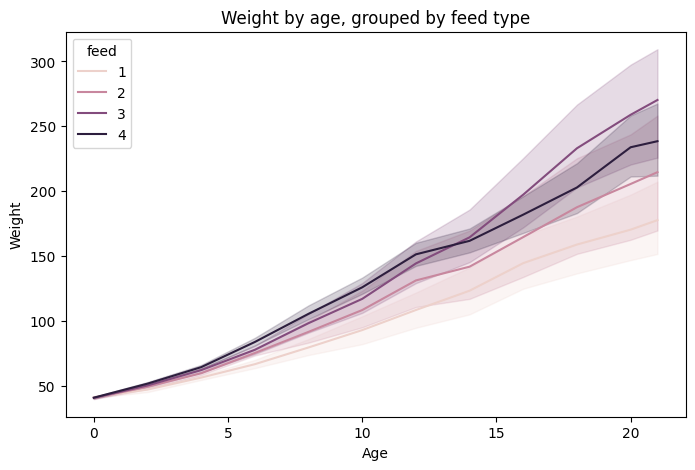

In [26]:
plt.figure(figsize=(8,5))

sns.lineplot(
    data=df,
    x='age',        
    y='weight',      
    hue='feed'      
)

plt.title("Weight by age, grouped by feed type")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

**Interpretation:**

The visualization shows that chickens in **feed group 3** achieve the highest average weight toward the later stages of their lifespan.

Over time, chickens fed with **feed type 4** initially gain weight more rapidly, but are overtaken by **feed group 3** at approximately **age 14**.

This indicates that while some feeding strategies accelerate early growth, others lead to higher long-term weight outcomes.


## Individual Chicken Weight Trajectories Over Time


### Business Question
How does the weight of individual chickens develop over time, and how much variability exists between individual growth trajectories?

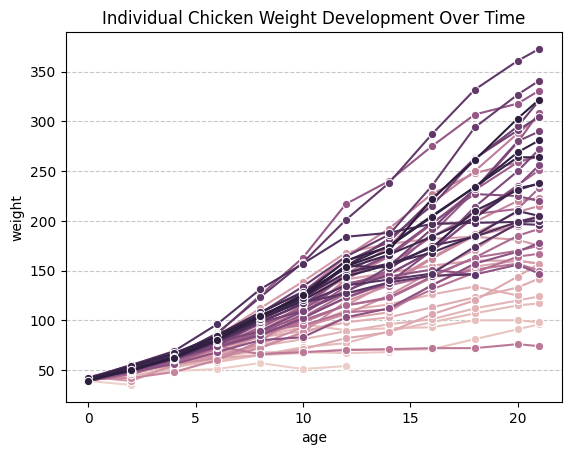

In [31]:
sns.lineplot(x='age', y='weight', hue='chicken_category', marker='o', legend=False, data=df)
plt.title("Individual Chicken Weight Development Over Time")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretation:**

The visualization highlights substantial variability in individual weight trajectories among chickens.

While all chickens show a general upward trend in weight as age increases, the rate of growth differs considerably between individuals. Some chickens gain weight steadily, whereas others experience more rapid growth, particularly at later ages.

This variability suggests that individual factors, such as genetics or feeding efficiency, may play a significant role in weight development beyond age alone.


## Comparison of Weight Development by Feed Type

### Business Question
How does chicken weight development over time differ across feeding strategies, and how consistent are individual growth patterns within each feed group?


Text(0.5, 1.03, 'Weight Development Over Time by Feed Type')

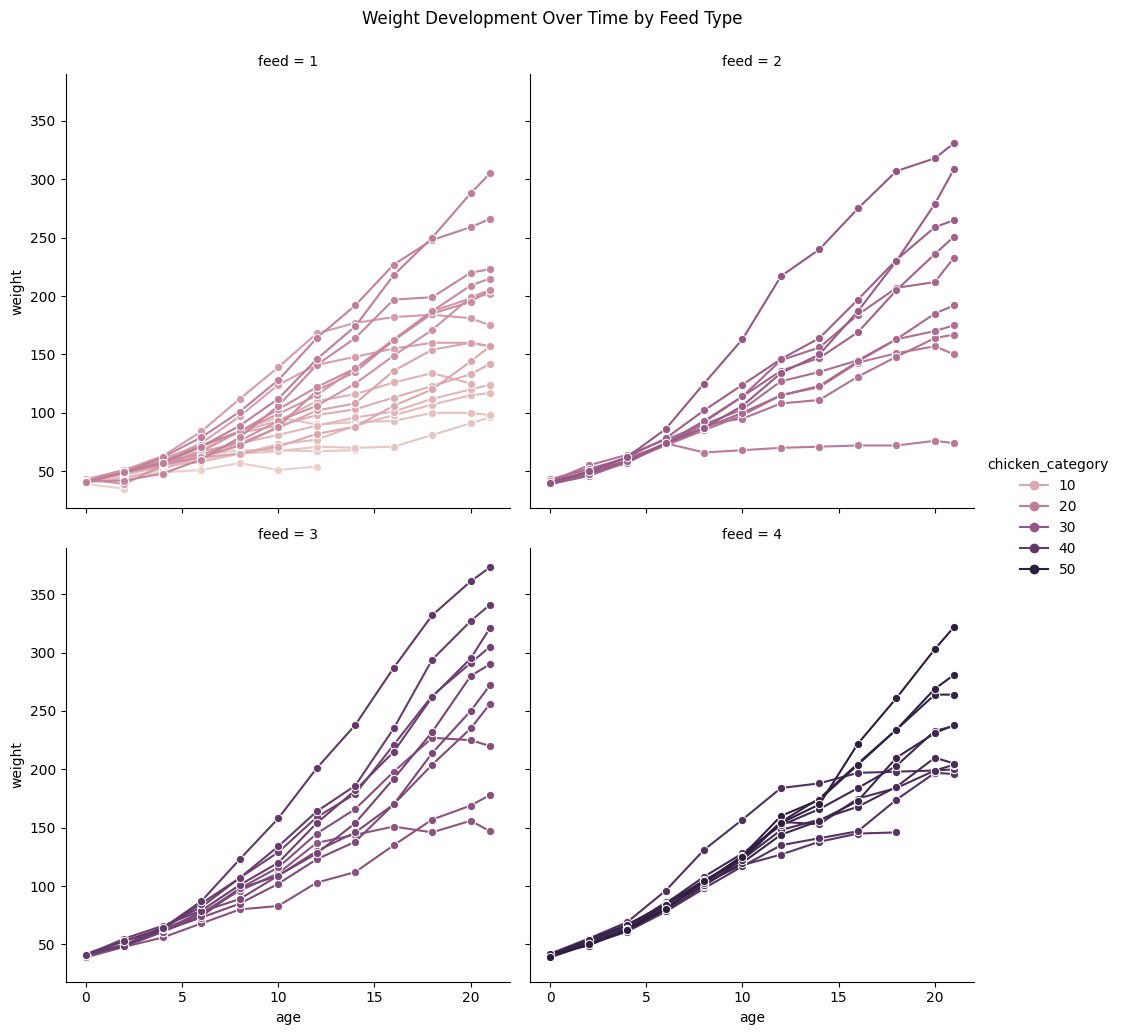

In [33]:
sns.relplot(
    data=df,
    x='age',         
    y='weight',      
    hue='chicken_category',       
    kind='line',      
    col='feed',     
    col_wrap=2,
    marker='o'        
)
facet_kws={'sharex': True, 'sharey': True}
plt.suptitle("Weight Development Over Time by Feed Type", y=1.03)

**Interpretation:**

It can be observed that chickens in **feed group 4** show the most consistent weight gain over time. There also appears to be one chicken that stopped gaining weight at approximately **age 18**, which may indicate that the chicken died or dropped out of the observation period. Within **feed group 2**, two chickens stand out as clear outliers. One chicken gains weight more rapidly than the others starting from around **age 4**, while another chicken shows a decline in weight after age 4. This may indicate potential health issues affecting this individual. The correlation between **feed type and weight** is relatively low (approximately **21%**), even though previous analyses showed that feeding strategies influence chicken weight. This low correlation can be explained by the fact that **feed type is a categorical variable**, while correlation measures linear relationships between **numerical variables** only.


## Correlation Analysis Between Age, Weight, and Feed Type

### Business Question
How strongly are age, weight, and feeding strategy related, and what insights can correlation analysis provide about their relationships?

In [34]:
korrelation = df.corr()

print(korrelation)

                    weight       age  chicken_category      feed
weight            1.000000  0.837102          0.296305  0.208196
age               0.837102  1.000000          0.036025  0.018605
chicken_category  0.296305  0.036025          1.000000  0.954708
feed              0.208196  0.018605          0.954708  1.000000


In [35]:
df.corr()

,weight,age,chicken_category,feed
weight,1.000000,0.837102,0.296305,0.208196
age,0.837102,1.000000,0.036025,0.018605
chicken_category,0.296305,0.036025,1.000000,0.954708
feed,0.208196,0.018605,0.954708,1.000000


In [ ]:
Korrelationsmatrix= df.corr()

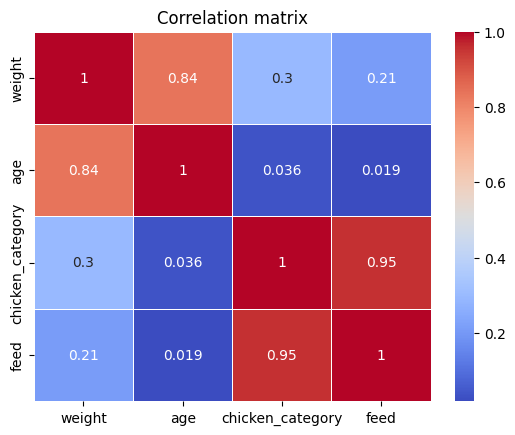

In [36]:
sns.heatmap(
    df.corr(),
    annot=True,       
    cmap='coolwarm',  
    linewidths=0.5    
)

plt.title("Correlation matrix")
plt.show()

**Interpretation:**

The correlation matrix shows a strong positive relationship between **age and weight** (correlation ≈ 0.84), indicating that chicken weight increases consistently as age increases.

The correlation between **feed type and weight** is relatively weak (approximately 0.21). This does not contradict earlier findings that feeding strategy influences weight development, but rather reflects a methodological limitation: feed type is a categorical variable, while correlation measures linear relationships between numerical variables.

Additionally, the strong correlation between **chicken identifier and feed type** suggests that feed assignment is consistent within individual chickens and should not be interpreted as a meaningful biological relationship.

Overall, this analysis highlights that correlation is useful for identifying linear numerical relationships, but should be complemented with grouped analyses and visualizations when categorical variables are involved.


## Weight Differences Across Age Groups

### Business Question
How does chicken weight differ across age groups, and does feeding strategy influence these differences?

In [39]:
bins = [0, 7, 14, 100]  
labels = ['Young (0–7 days)', 'Middle (8–14 days)', 'old (from 15 days)']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df

,weight,age,chicken_category,feed,age_group
0,42,0,15,1,Young (0–7 days)
1,51,2,15,1,Young (0–7 days)
2,59,4,15,1,Young (0–7 days)
3,64,6,15,1,Young (0–7 days)
4,76,8,15,1,Middle (8–14 days)
...,...,...,...,...,...
573,175,14,48,4,Middle (8–14 days)
574,205,16,48,4,old (from 15 days)
575,234,18,48,4,old (from 15 days)
576,264,20,48,4,old (from 15 days)


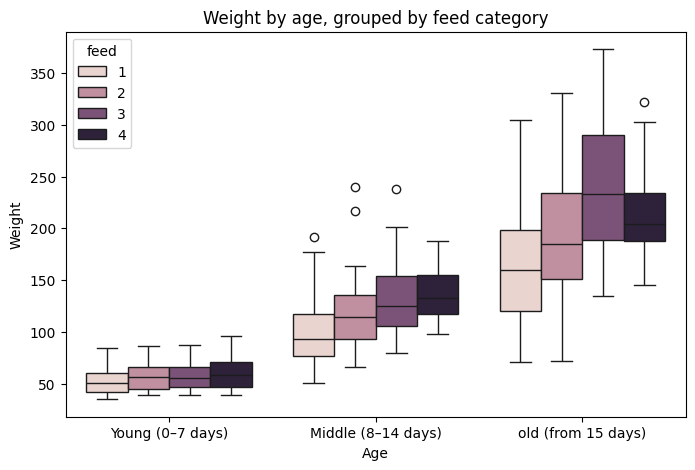

In [40]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x='age_group',        
    y='weight',      
    hue='feed'      
)

plt.title("Weight by age, grouped by feed category")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

**Interpretation:**

The boxplot highlights clear weight differences across age groups and feeding categories.

As expected, weight increases significantly with age. Chickens in the **young group (0–7 days)** show relatively low and tightly clustered weights across all feed categories, indicating limited variation at early growth stages.

In the **middle age group (8–14 days)**, weight variability increases and differences between feed categories become more pronounced. Certain feed types are associated with higher median weights, suggesting that feeding strategy begins to play a more visible role during this growth phase.

The **old age group (15+ days)** exhibits the highest median weights as well as the widest spread, indicating substantial individual growth differences. Feed categories differ notably in both median and variability, implying that feeding strategy has a stronger impact at later stages of

## Final Interpretation & Recommendations

This exploratory data analysis examined the relationship between **age**, **feed category**, and **weight development** of chickens over time.

The results clearly show that **age is the dominant factor influencing weight gain**. Weight increases steadily as chickens grow older, which is consistent across all analyses, including descriptive statistics, time-series visualizations, and age-group comparisons.

In addition, the **feed category plays an important secondary role**, particularly at later growth stages. While weight differences between feed types are minimal in early life (0–7 days), they become increasingly pronounced in middle (8–14 days) and older age groups (15+ days). Certain feed categories are associated with higher median weights and greater variability, suggesting differences in growth efficiency and individual response to feeding strategies.

The correlation analysis supports these findings:  
- **Weight and age** show a strong positive correlation, confirming their close relationship.  
- The correlation between **feed and weight** is relatively low, which is expected since feed is a categorical variable and correlation measures linear relationships between numeric variables. Visual analysis therefore provides more meaningful insights in this context.

Several **outliers and unusual growth patterns** were identified, such as individual chickens with unusually rapid or declining weight gain. These cases may indicate health issues, measurement errors, or exceptional biological variation and should be investigated further in a real-world setting.

---

### Recommendations

- **Collect additional data**: A larger sample size and more balanced feed groups would allow for more robust statistical conclusions.
- **Include health and environmental variables**: Factors such as illness, housing conditions, or temperature could help explain individual growth deviations.
- **Apply inferential statistics**: Future analyses could include hypothesis testing (e.g., ANOVA) to formally assess differences between feed categories.
- **Support decision-making**: If weight gain is a key business objective, feed strategies should be evaluated particularly for older chickens, where their impact appears strongest.

Overall, this analysis provides a solid foundation for understanding growth patterns and highlights how exploratory data analysis can support data-driven decisions in agricultural and biological contexts.
